In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('retail_data.csv')

In [4]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
df = df.drop_duplicates()

In [7]:
total_transactions = len(df['Transaction_ID'].unique())
print(f'El número total de transacciones son {total_transactions}, y el total de filas son {df.shape[0]}')

El número total de transacciones son 294462, y el total de filas son 302006


## Revisando Nulos

In [8]:
null_percent = df.isnull().sum().div(df.shape[0]).mul(100) 
null_percent

Transaction_ID      0.110263
Customer_ID         0.101985
Name                0.126488
Email               0.114898
Phone               0.119865
Address             0.104303
City                0.082118
State               0.093045
Zipcode             0.112581
Country             0.089733
Age                 0.057284
Gender              0.104965
Income              0.096025
Customer_Segment    0.071191
Date                0.118872
Year                0.115892
Month               0.090396
Time                0.115892
Total_Purchases     0.119534
Amount              0.117878
Total_Amount        0.115892
Product_Category    0.093707
Product_Brand       0.093045
Product_Type        0.000000
Feedback            0.060926
Shipping_Method     0.111587
Payment_Method      0.098342
Order_Status        0.077813
Ratings             0.060926
products            0.000000
dtype: float64

In [9]:
filas_con_nulos = len(df[df.isnull().values])
percent_nulls = (filas_con_nulos*100)/(df.shape[0])


print(f'El total de columnas que tienen al menos 1 registo null es de  {filas_con_nulos} y en relación al dataframe eso representa {percent_nulls:.2f} %')

El total de columnas que tienen al menos 1 registo null es de  8382 y en relación al dataframe eso representa 2.78 %


### CONCLUSIÓN:

- Considerando lo anterior podemos eliminar estos datos ya que en sus respectivas columnas son todos < 1 % y al eliminar todos estos seria eliminar solo el 2.78 % de los datos

In [10]:
# Eliminando los nulos
df.dropna(inplace=True)

In [11]:
total_nulos = df.isnull().sum().sum()
print(f'Por lo tanto el total de nulos es de {total_nulos}')

Por lo tanto el total de nulos es de 0


In [12]:
total_duplicados = df.duplicated().sum()

print(f'El total de registros duplicados es de {total_duplicados}')

El total de registros duplicados es de 0


In [13]:
df[df.duplicated(keep=False)].to_csv("duplicados_detectados.csv", index=False)


In [14]:
df

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [15]:

def col_type_gen(*dtypes):
    filter_cols = [col for col in df.select_dtypes(include=dtypes).columns if col not in ['Year', 'Date', 'Month', 'Time']]
    return filter_cols

In [16]:
numeric_cols = col_type_gen('float','int')
object_cols = col_type_gen('object')

In [17]:
numeric_cols

['Transaction_ID',
 'Customer_ID',
 'Phone',
 'Zipcode',
 'Age',
 'Total_Purchases',
 'Amount',
 'Total_Amount',
 'Ratings']

- Por ahora estas columnas numéricas se ven bien. Ahora nos toca revisar las objects que pueden tener numéricas mezcladas

In [18]:
df['Ratings'] = pd.Categorical(df['Ratings'].astype(int), ordered=True)

In [19]:
numeric_cols.remove('Ratings')

In [20]:
object_cols

['Name',
 'Email',
 'Address',
 'City',
 'State',
 'Country',
 'Gender',
 'Income',
 'Customer_Segment',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'products']

In [21]:
def object_classifier(objc_columns:list)->list:



    binary_cols = [col for col in object_cols if len(list(df[col].unique()))<=2]
    obj_not_binary = [col for col in object_cols if len(list(df[col].unique()))>2]

    return binary_cols, obj_not_binary

In [22]:
binary_cols, object_cols = object_classifier(object_cols)

In [23]:
binary_cols

['Gender']

In [24]:
object_cols

['Name',
 'Email',
 'Address',
 'City',
 'State',
 'Country',
 'Income',
 'Customer_Segment',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'products']

# EDA

In [25]:
df[numeric_cols].describe().applymap(lambda x: f"{x:.2f}")


C:\Users\kev_g\AppData\Local\Temp\ipykernel_23572\191231607.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols].describe().applymap(lambda x: f"{x:.2f}")


,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Total_Purchases,Amount,Total_Amount
count,293908.00,293908.00,293908.00,293908.00,293908.00,293908.00,293908.00,293908.00
mean,5493738.72,55013.64,5500608709.17,50288.46,35.47,5.36,255.15,1367.68
std,2596094.87,26009.43,2596115745.70,28976.64,15.02,2.87,141.39,1128.90
min,1000007.00,10000.00,1000049414.00,501.00,18.00,1.00,10.00,10.00
25%,3245885.75,32470.00,3253506772.50,25408.00,22.00,3.00,132.84,438.84
50%,5495915.00,55027.00,5504455104.00,50586.00,32.00,5.00,255.46,1041.16
75%,7738209.75,77514.00,7749807399.50,75252.25,46.00,8.00,377.64,2028.95
max,9999995.00,99999.00,9999996122.00,99949.00,70.00,10.00,500.00,4999.63


In [26]:
# Valores Mínimos
df[numeric_cols].describe().applymap(lambda x: f"{x:.2f}").loc[['min','max'], 'Age':'Total_Amount'].reset_index()

C:\Users\kev_g\AppData\Local\Temp\ipykernel_23572\437837934.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols].describe().applymap(lambda x: f"{x:.2f}").loc[['min','max'], 'Age':'Total_Amount'].reset_index()


,index,Age,Total_Purchases,Amount,Total_Amount
0,min,18.00,1.00,10.00,10.00
1,max,70.00,10.00,500.00,4999.63


- Los valores mínimos no parecen tener ninguna inconsistencia, así como los máximos

In [27]:
df['Gender'] = pd.Categorical(df['Gender'])

In [28]:
object_cols

['Name',
 'Email',
 'Address',
 'City',
 'State',
 'Country',
 'Income',
 'Customer_Segment',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'products']

In [29]:
df.sample(1000, replace=True).head(10)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
14722,2295045.0,81812.0,Glenn Harrison,Christopher32@gmail.com,8.437280e+09,8253 Bolton Circle Apt. 225,Portsmouth,England,75309.0,UK,...,3754.924526,Clothing,Zara,Jeans,Bad,Express,Credit Card,Delivered,1,Bootcut jeans
121009,3981364.0,97997.0,Angel Flores,Thomas91@gmail.com,6.685963e+09,3661 Lauren Crescent Suite 876,Regina,Ontario,48364.0,Canada,...,2232.022913,Books,Random House,Fiction,Excellent,Same-Day,Credit Card,Delivered,4,Dystopian
100215,4236221.0,42401.0,Mallory Newman,Jason53@gmail.com,6.736476e+09,363 Robert Lights,Hobart,New South Wales,54249.0,Australia,...,1100.758226,Grocery,Pepsi,Soft Drink,Excellent,Same-Day,Debit Card,Shipped,4,Energy drink
202060,5630620.0,28170.0,Paul Garcia,Autumn82@gmail.com,8.525136e+09,5258 Hill Stravenue,Toowoomba,New South Wales,72011.0,Australia,...,625.081029,Home Decor,IKEA,Decorations,Good,Express,Cash,Shipped,3,Curtains
28809,9628783.0,25356.0,Holly Boyd,Valerie100@gmail.com,3.620685e+09,4916 Oliver Crossing,Frankfurt,Berlin,40480.0,Germany,...,687.584263,Home Decor,IKEA,Furniture,Excellent,Express,Cash,Delivered,5,Dining table
113692,1626363.0,65118.0,Caitlin Juarez,Darlene76@gmail.com,5.226699e+09,0098 Foster Path,Darwin,New South Wales,47784.0,Australia,...,2720.428738,Home Decor,Bed Bath & Beyond,Kitchen,Excellent,Same-Day,Credit Card,Processing,4,Microwave
157605,1457043.0,72022.0,David Meadows,Matthew29@gmail.com,5.362986e+09,35829 French Ways,Boston,Georgia,84003.0,USA,...,1622.941874,Home Decor,Home Depot,Decorations,Average,Express,Cash,Delivered,2,Clocks
103018,2232726.0,60373.0,Benjamin King,John81@gmail.com,7.712009e+09,2151 Jessica Hills,Cologne,Berlin,79677.0,Germany,...,86.448468,Books,Penguin Books,Fiction,Excellent,Express,Credit Card,Shipped,4,Romance
175760,9507914.0,82055.0,James Hall,Bobby61@gmail.com,9.028454e+09,9151 Johnson Canyon Apt. 666,Manchester,England,79685.0,UK,...,930.116840,Electronics,Samsung,Smartphone,Good,Same-Day,Credit Card,Processing,3,Nokia
175416,1385451.0,43883.0,Brian Ball,Robert44@gmail.com,4.460286e+09,12590 Justin Village Suite 984,Münster,Berlin,68963.0,Germany,...,210.994523,Grocery,Pepsi,Juice,Excellent,Standard,Cash,Pending,5,Apple juice


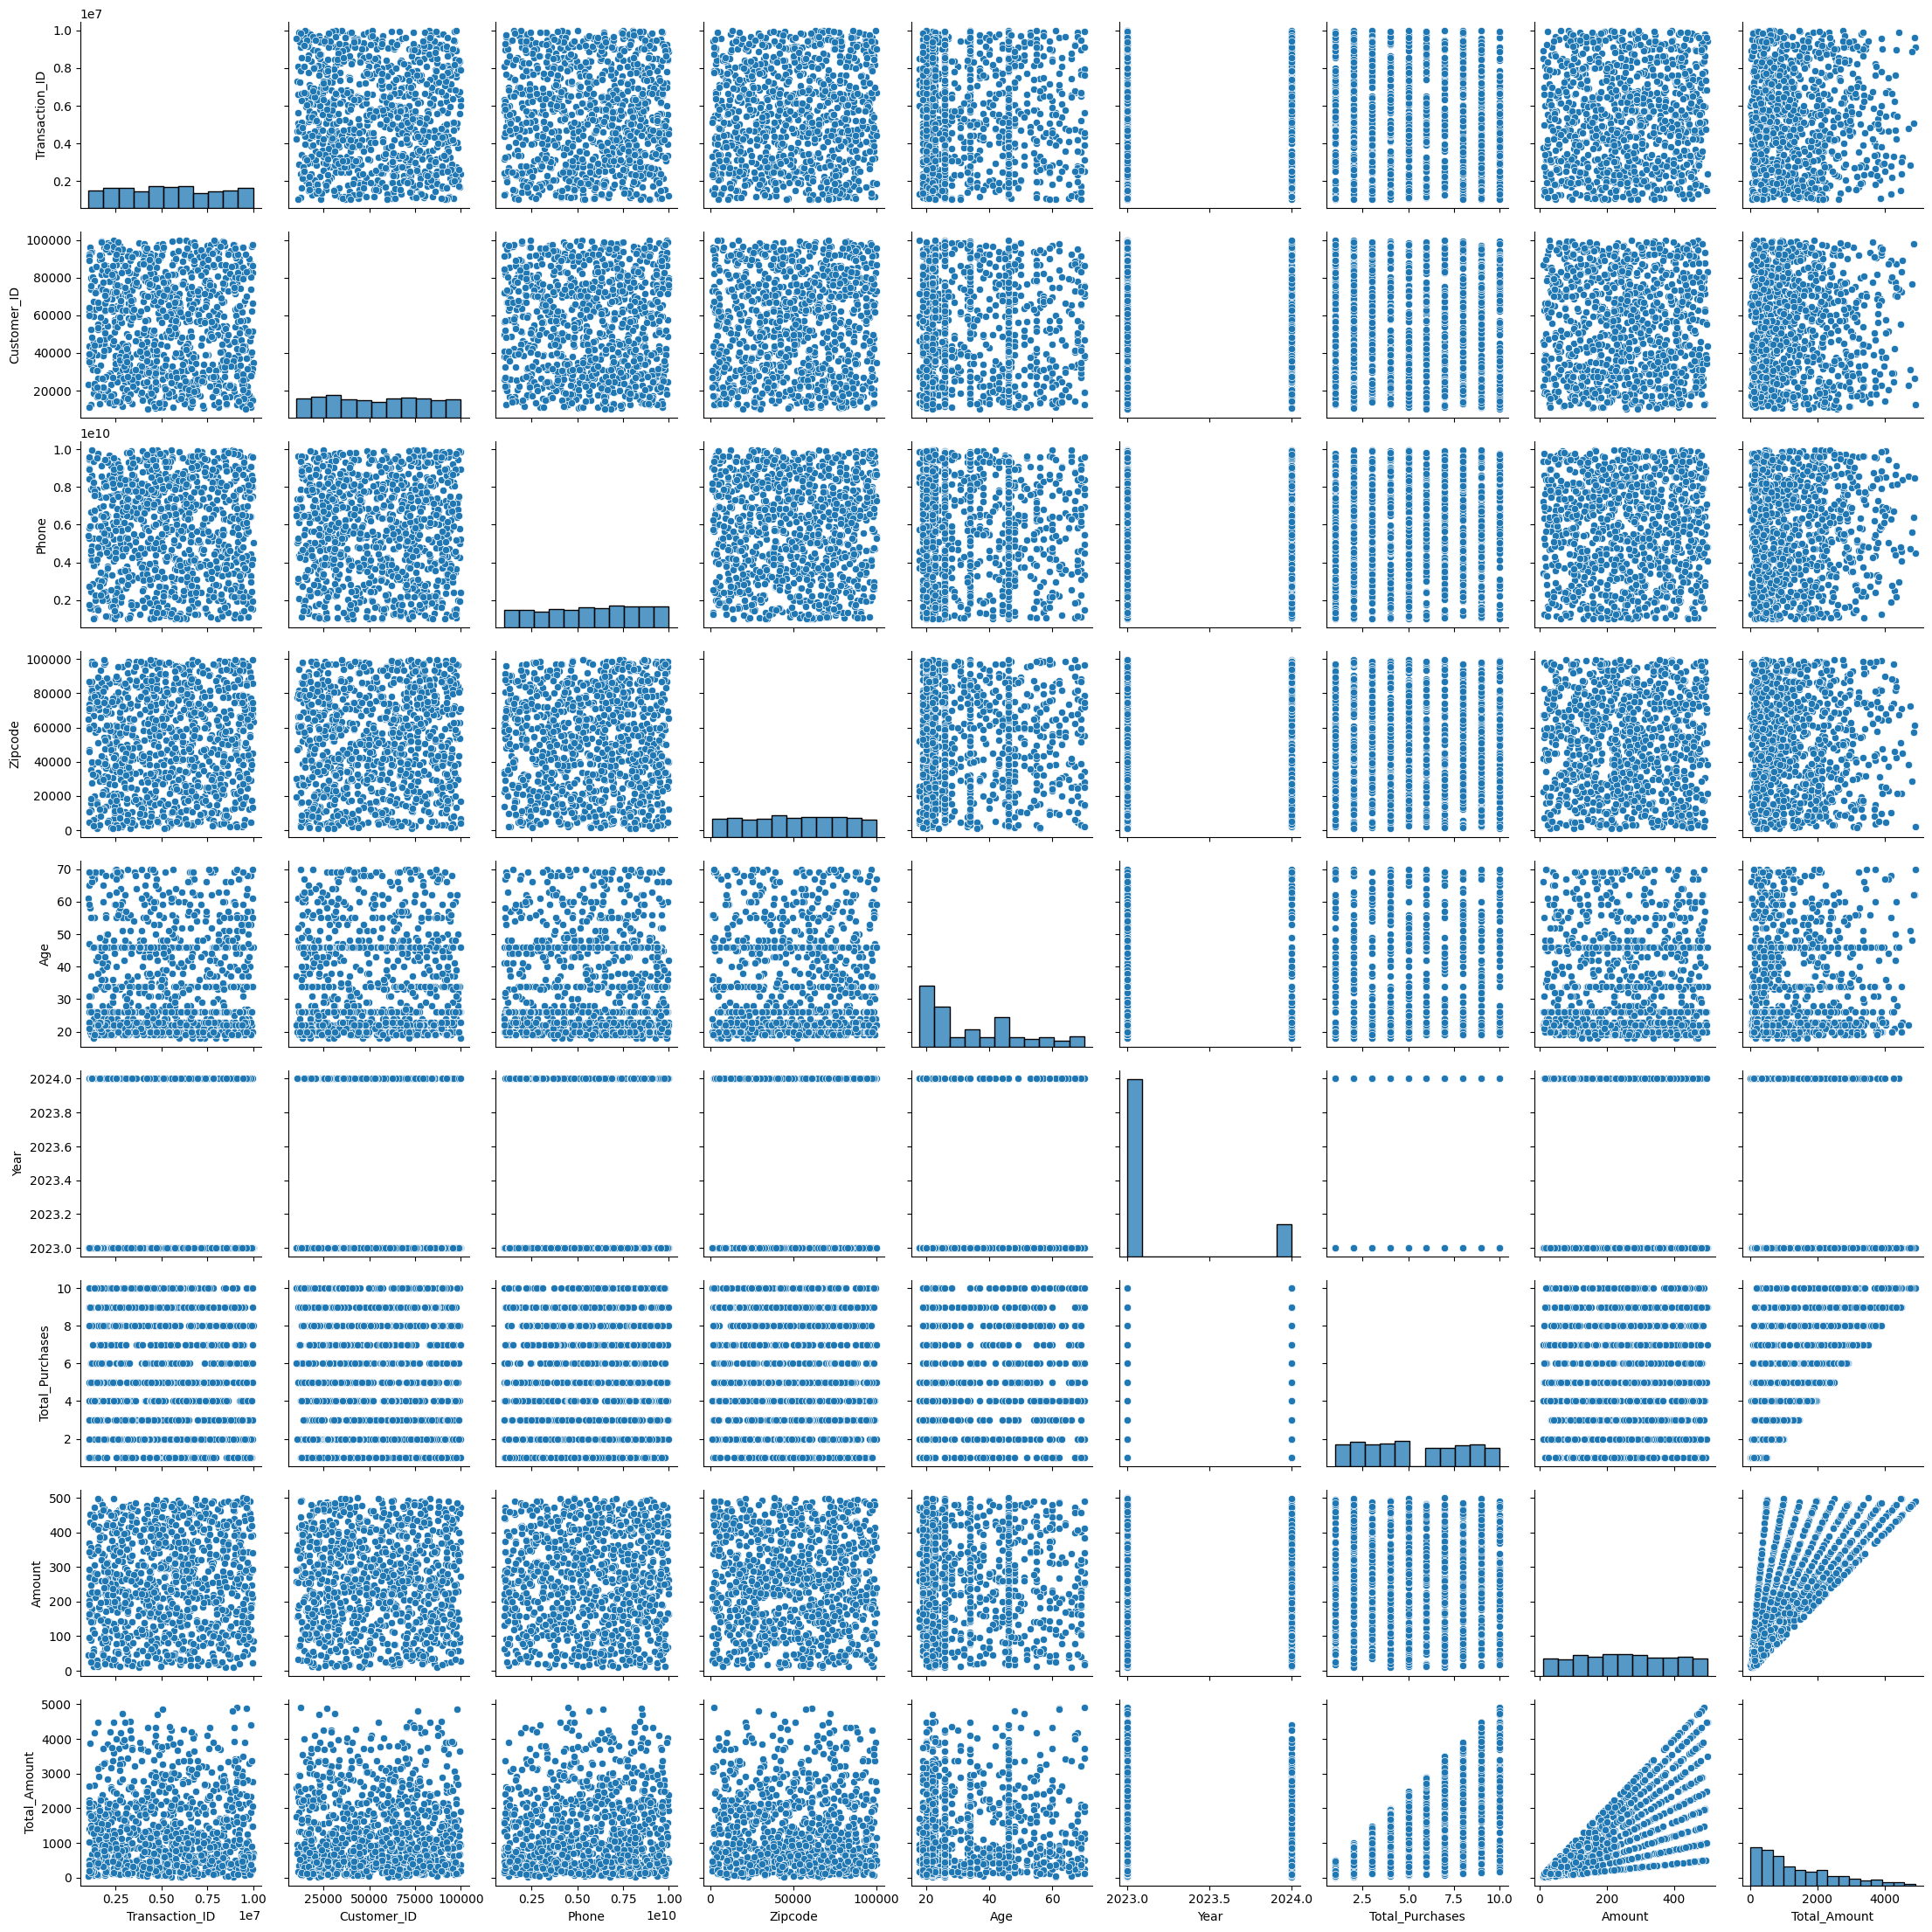

In [30]:
df_sample = df.sample(n=1000, replace=True, random_state=42)

# Crear el pairplot
sns.pairplot(data=df_sample)
plt.show()

## COLUMNAS DATES

In [31]:
df['Date']

0          9/18/2023
1         12/31/2023
2          4/26/2023
3           05-08-23
4           01-10-24
             ...    
302005     1/20/2024
302006    12/28/2023
302007     2/27/2024
302008      09-03-23
302009      01-08-24
Name: Date, Length: 293908, dtype: object

In [32]:
df['Date'] = df['Date'].str.replace('/','-').str.replace(r'-(23)$', '-2023', regex=True).str.replace(r'-(24)$', '-2024', regex=True)

In [33]:
df['Date'] = pd.to_datetime(df['Date'])


In [34]:
df['Year'] = pd.to_datetime(df['Year'])
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month


In [35]:
df['Time'] = pd.to_timedelta(df['Time'])

In [36]:
df['Horas'] = df['Time'].dt.components.hours

In [37]:
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]  # 11 valores → 10 categorías
labels = ['18 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', 
          '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70']  # 10 categorías

# Aplicar pd.cut()
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [38]:
df['Age_Group'] = pd.Categorical(df['Age_Group'], ordered=True)

In [39]:
object_cols

['Name',
 'Email',
 'Address',
 'City',
 'State',
 'Country',
 'Income',
 'Customer_Segment',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'products']

# EDAD

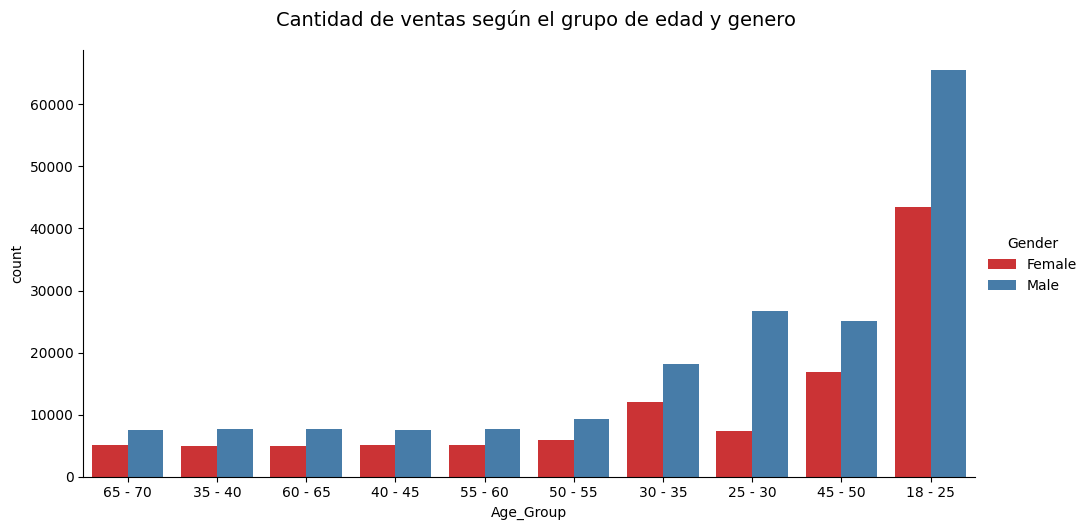

In [40]:

age_order = df['Age_Group'].value_counts().sort_values().index

g = sns.catplot(
    kind='count',
    data=df,
    x='Age_Group',  # Variable en el eje X
    hue='Gender',  # Variable para colores
    palette='Set1',
    height=5,
    aspect=2,
    order=age_order


)
g.fig.suptitle(t='Cantidad de ventas según el grupo de edad y genero', y=1.05,  fontsize=14)
# Mostrar el gráfico
plt.show()

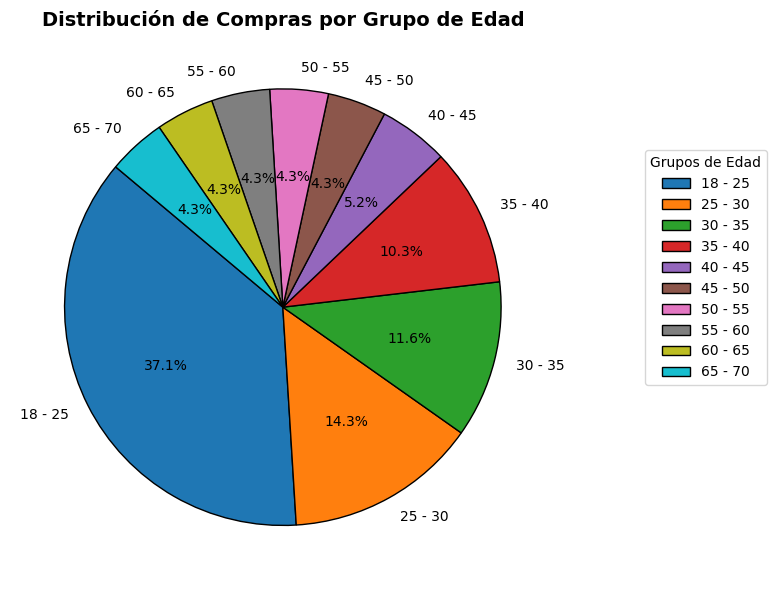

In [41]:
plt.figure(figsize=(10, 6))
plt.pie(df['Age_Group'].value_counts(), labels=df['Age_Group'].cat.categories,autopct=lambda p: f'{p:.1f}%' , startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(title="Grupos de Edad", loc="upper right", bbox_to_anchor=(1.4, 0.8))
plt.title("Distribución de Compras por Grupo de Edad", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

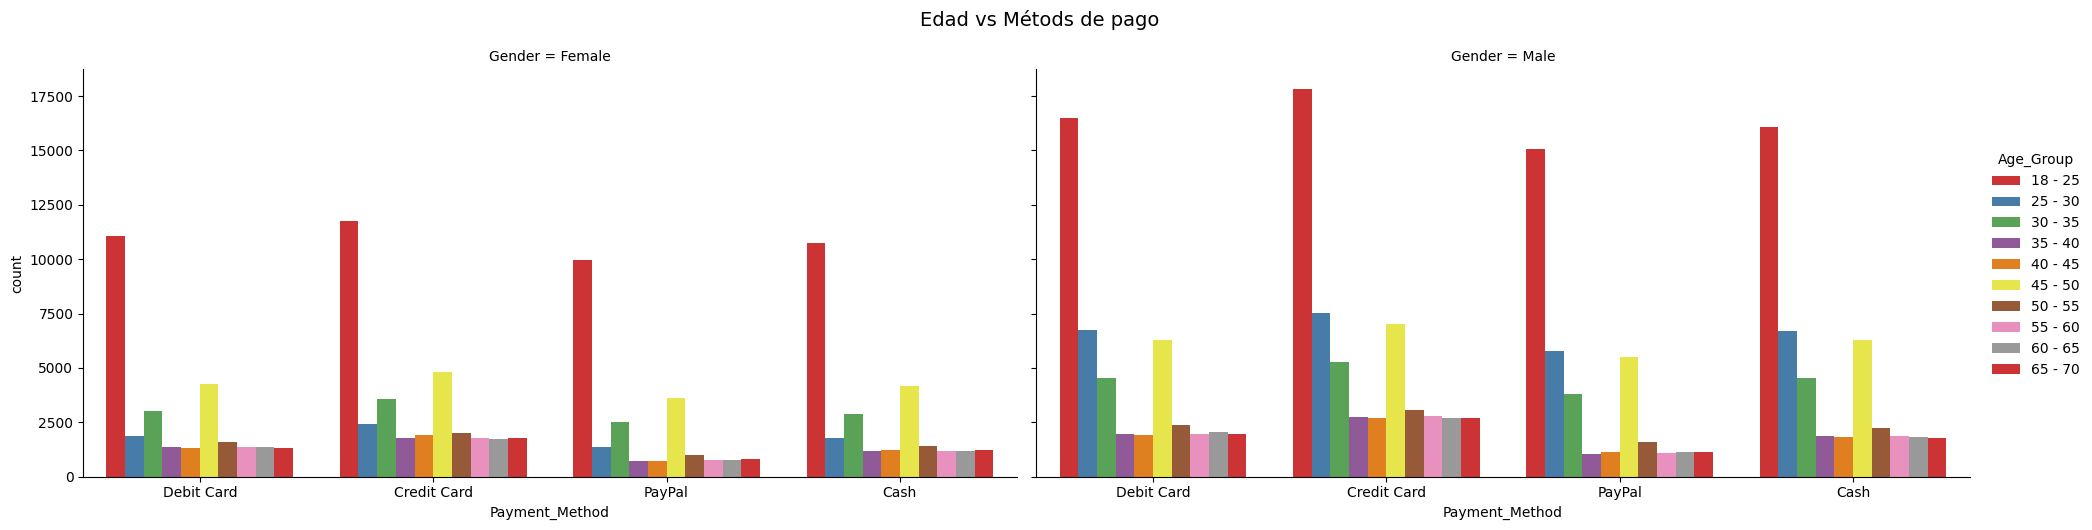

In [42]:
# Crear el gráfico con 'hue' para que Seaborn genere la leyenda

g = sns.catplot(
    kind='count',
    data=df,
    x='Payment_Method',  # Variable en el eje X
    hue='Age_Group',  # Variable para colores
    palette='Set1',
    height=5,
    aspect=2,
    col='Gender',

)
# Agregar título global
g.fig.suptitle(t='Edad vs Métods de pago', y=1.05,  fontsize=14)
# Mostrar el gráfico
plt.show()

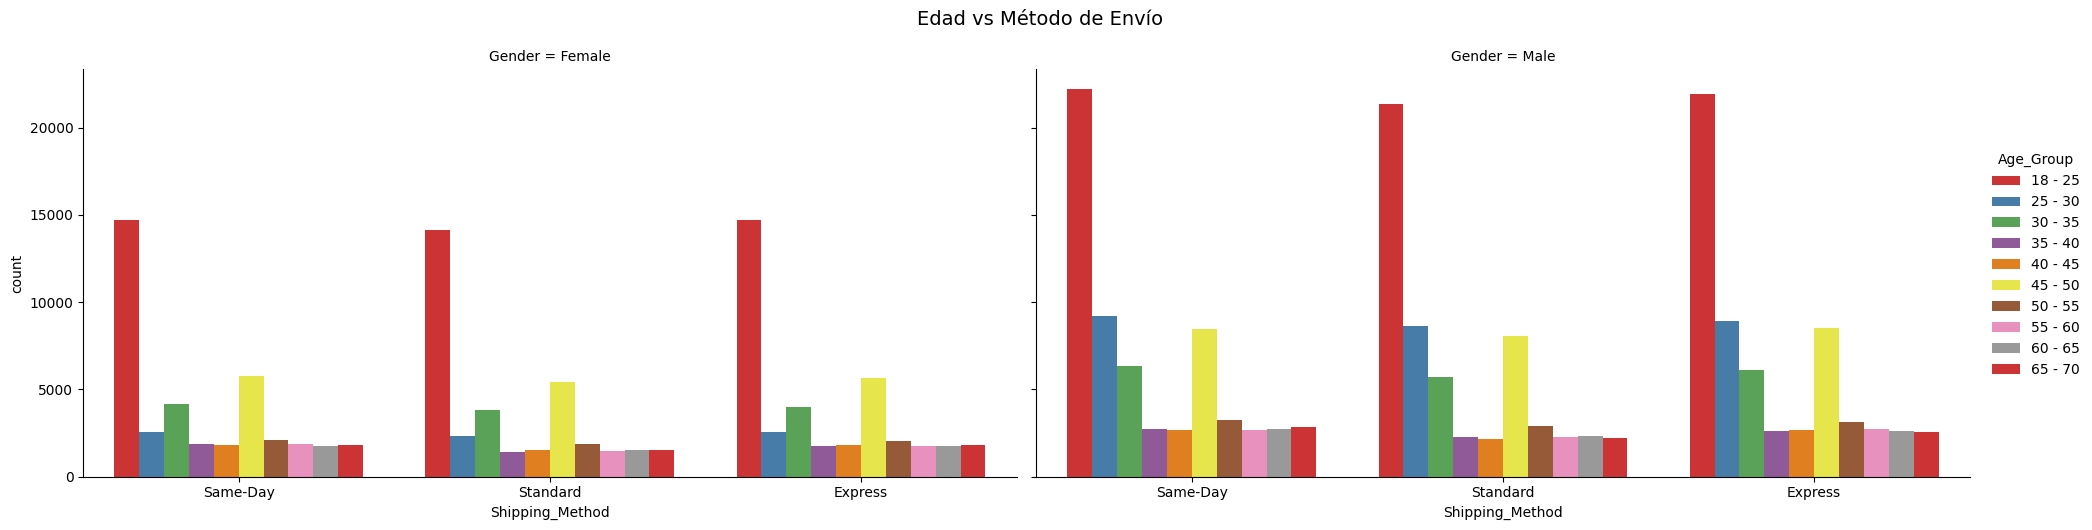

In [43]:
# Crear el gráfico con 'hue' para que Seaborn genere la leyenda

g = sns.catplot(
    kind='count',
    data=df,
    x='Shipping_Method',  # Variable en el eje X
    hue='Age_Group',  # Variable para colores
    palette='Set1',
    height=5,
    aspect=2,
    col='Gender'
)
# Agregar título global
g.fig.suptitle(t='Edad vs Método de Envío', y=1.05,  fontsize=14)
# Mostrar el gráfico
plt.show()


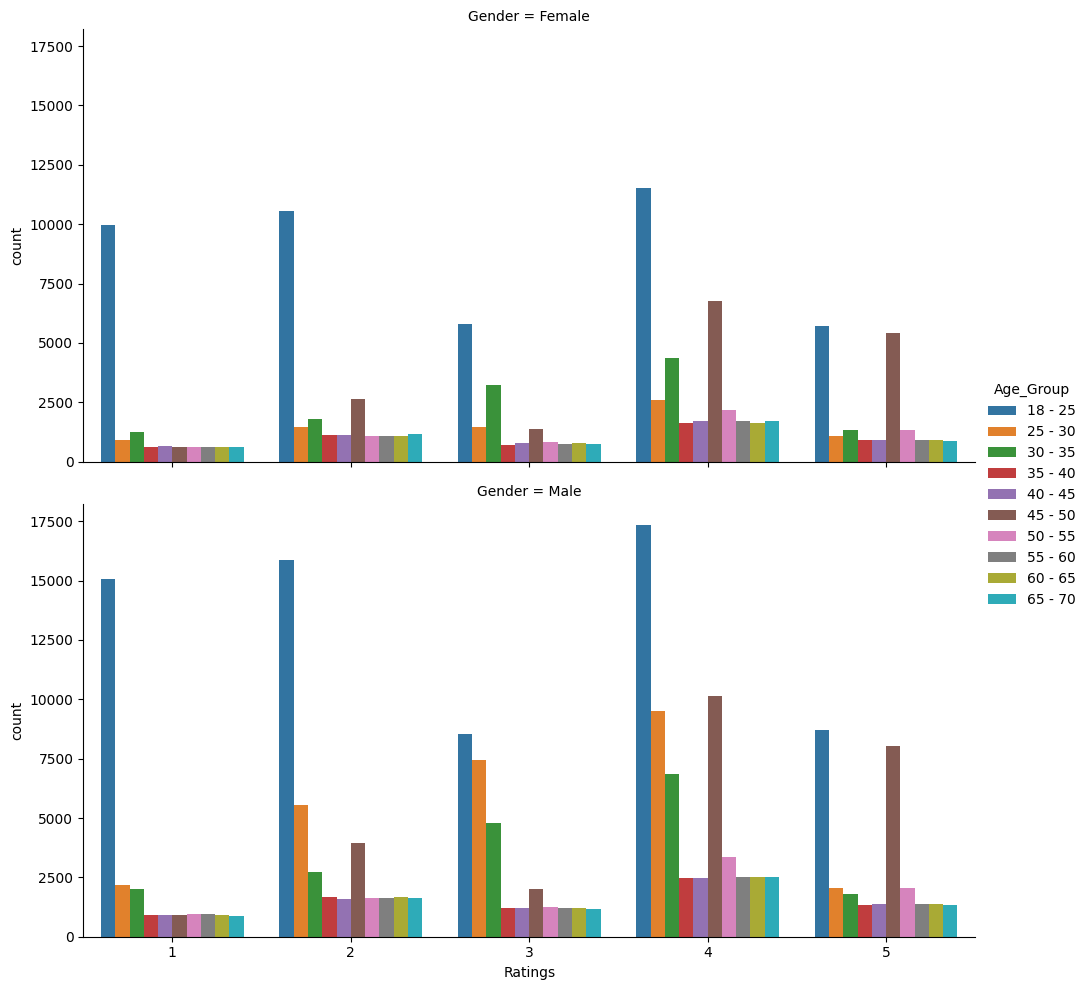

In [44]:
g = sns.catplot(data=df,
                kind='count',
                x='Ratings',
                row='Gender',
                hue='Age_Group',
                aspect=2)

plt.show()


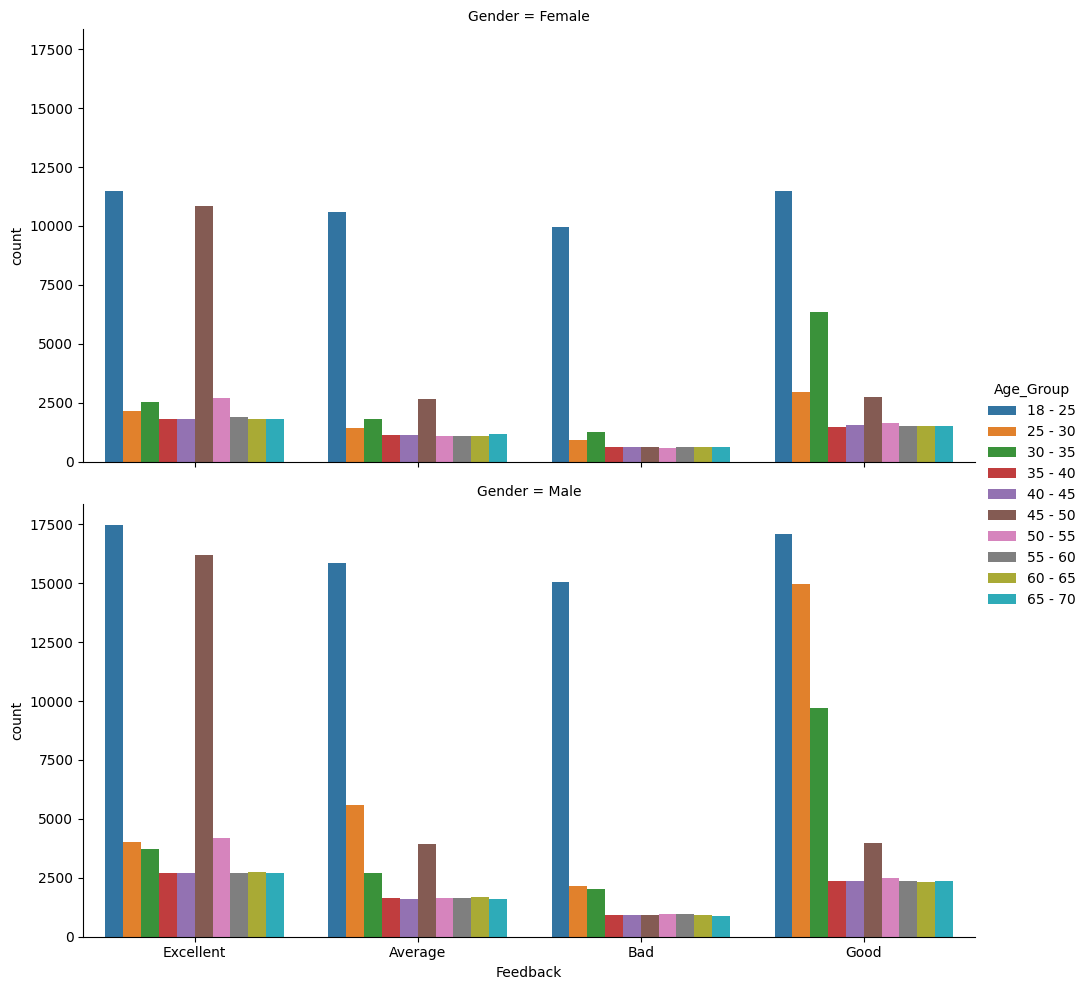

In [45]:
g = sns.catplot(data=df,
                kind='count',
                x='Feedback',
                row='Gender',
                hue='Age_Group',
                aspect=2)

plt.show()


In [46]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Horas,Age_Group
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts,22,18 - 25
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab,8,18 - 25
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment,4,45 - 50
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife,14,55 - 60
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies,16,18 - 25


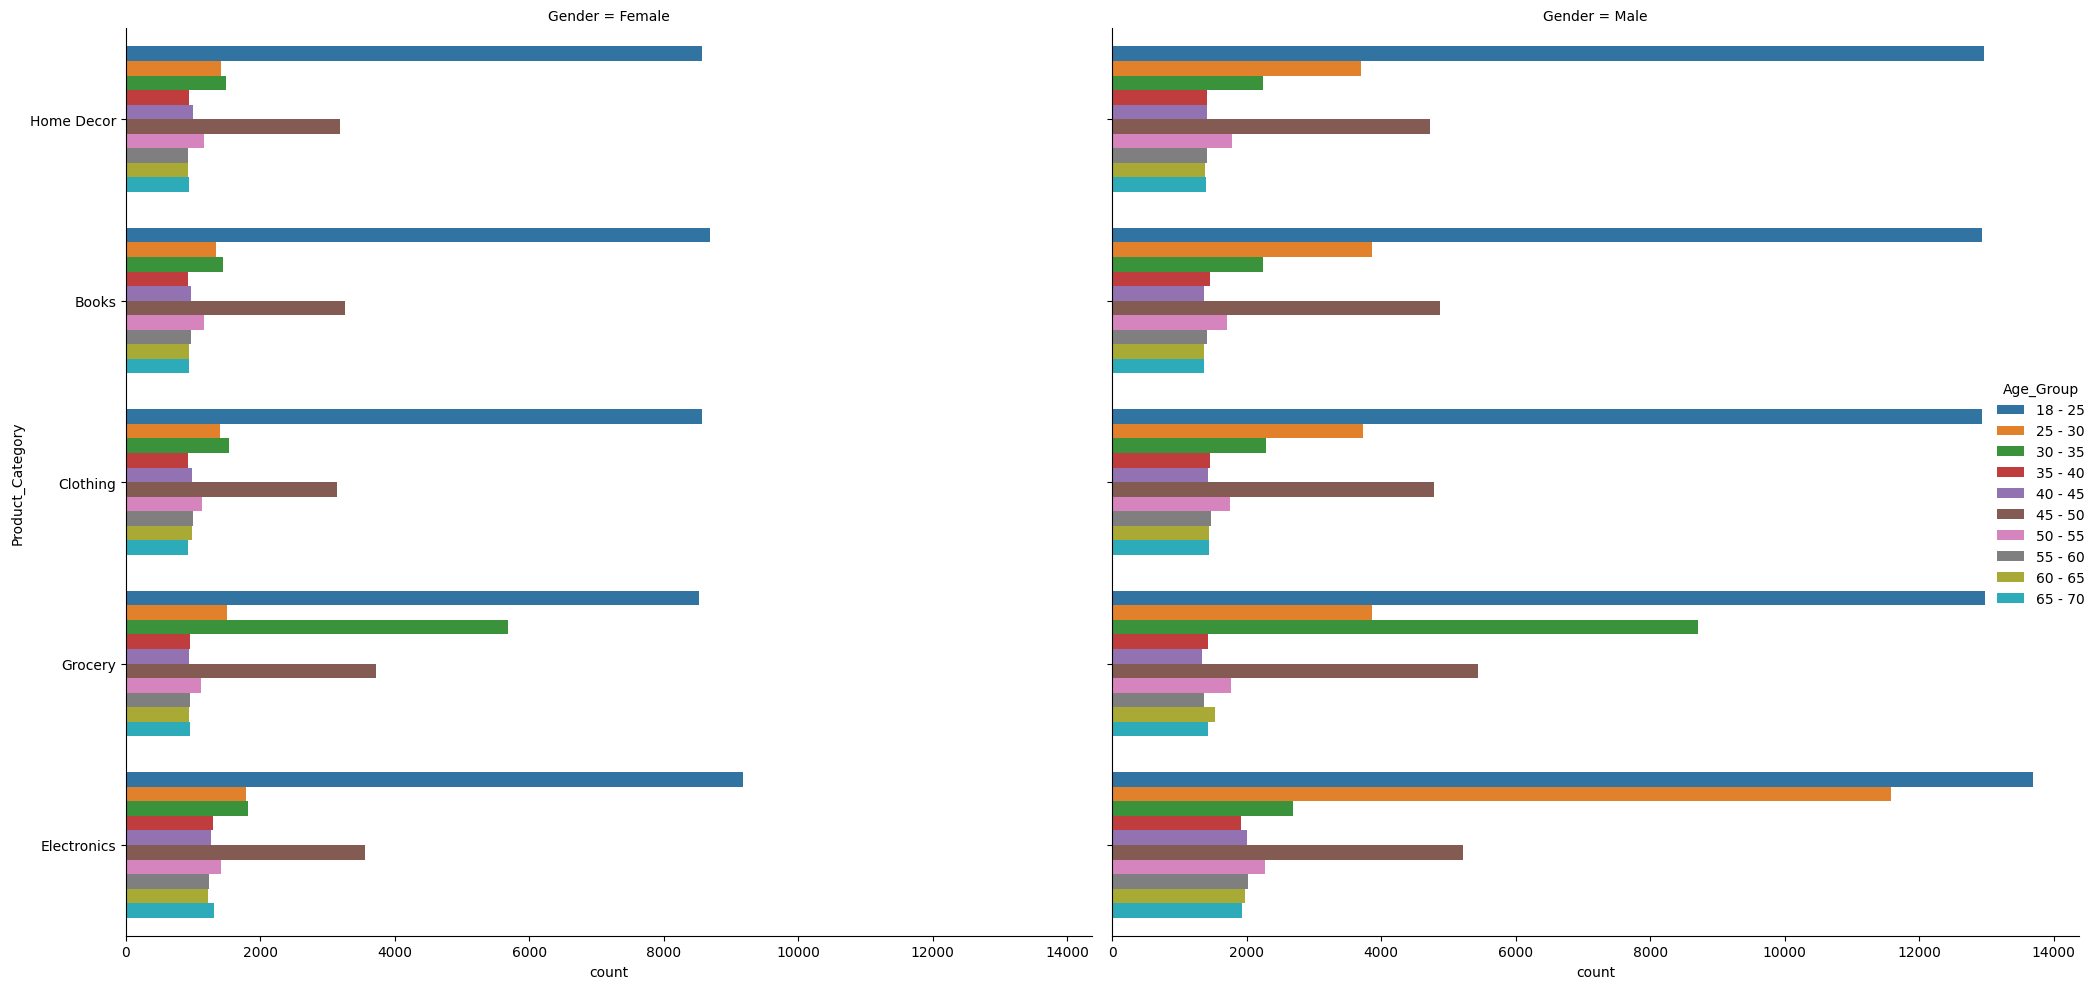

In [ ]:
product_order_cat = df['Product_Category'].value_counts().sort_values(ascending=True).index
product_order_cat
g = sns.catplot(data=df,
                kind='count',
                y='Product_Category',
                col='Gender',
                hue='Age_Group',
                height=10,
                order=product_order_cat)
g.fig.tight_layout()
plt.show()


In [87]:
df.groupby("Gender")["Product_Category"].value_counts().sort_values(ascending=True)

C:\Users\kev_g\AppData\Local\Temp\ipykernel_23572\958411789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Gender")["Product_Category"].value_counts().sort_values(ascending=True)


Gender  Product_Category
Female  Home Decor          20558
        Clothing            20572
        Books               20653
        Electronics         24074
        Grocery             25289
Male    Home Decor          32381
        Books               32546
        Clothing            32708
        Grocery             39836
        Electronics         45291
Name: count, dtype: int64

C:\Users\kev_g\AppData\Local\Temp\ipykernel_23572\1009325790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Age_Group", y="Total_Purchases", palette="magma")


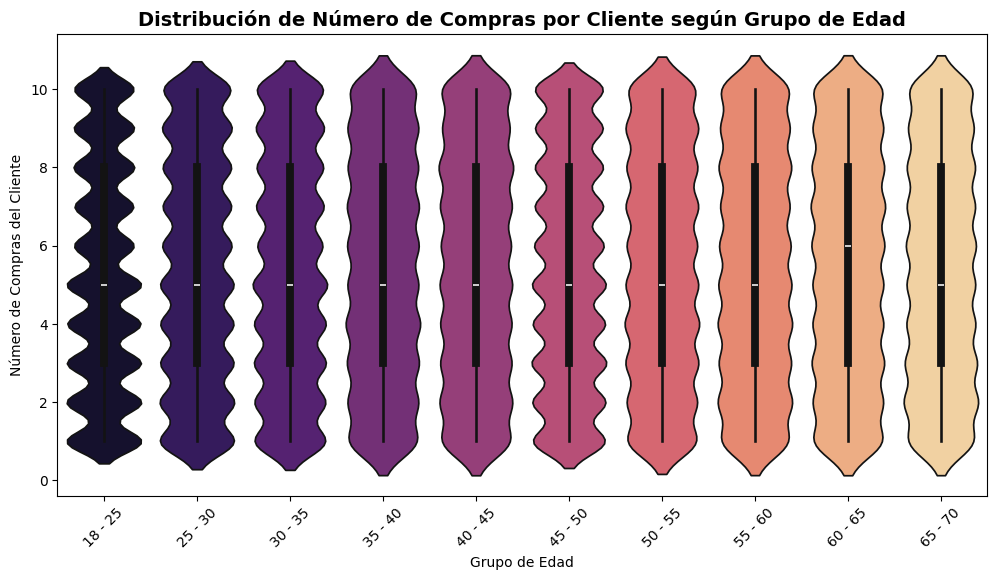

In [47]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Age_Group", y="Total_Purchases", palette="magma")

plt.title("Distribución de Número de Compras por Cliente según Grupo de Edad", fontsize=14, fontweight='bold')
plt.xlabel("Grupo de Edad")
plt.ylabel("Número de Compras del Cliente")
plt.xticks(rotation=45)
plt.show()

C:\Users\kev_g\AppData\Local\Temp\ipykernel_23572\3372454790.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='boxen', data=df, x='Age_Group', y='Total_Amount', palette='Spectral',  height=6, aspect=2, col='Gender' )


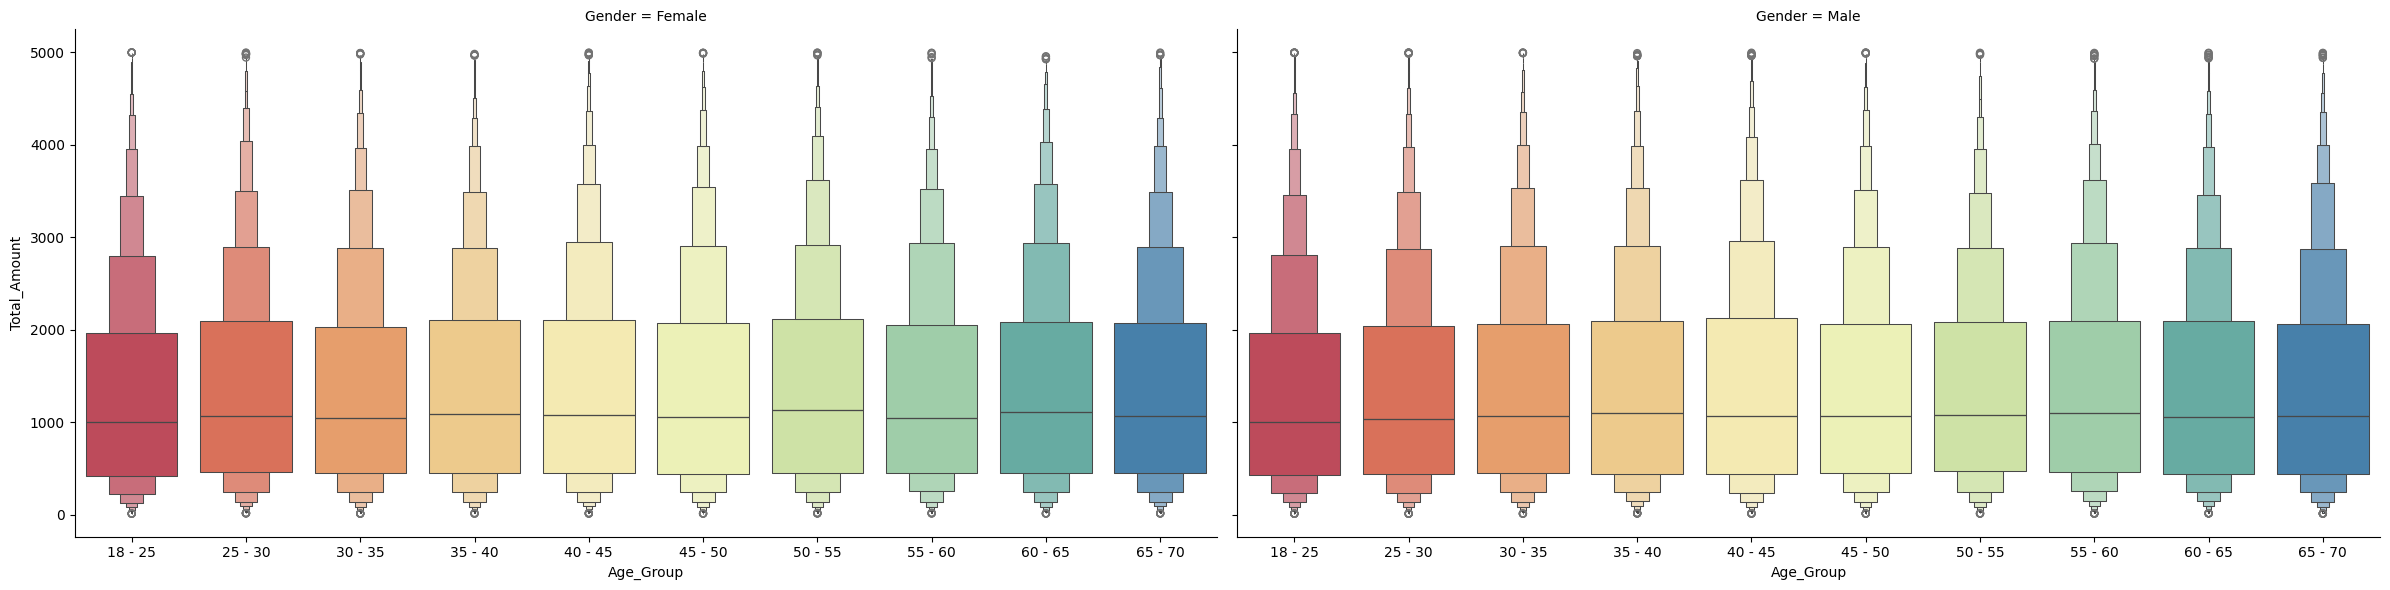

In [48]:
sns.catplot(kind='boxen', data=df, x='Age_Group', y='Total_Amount', palette='Spectral',  height=6, aspect=2, col='Gender' )
plt.show()

C:\Users\kev_g\AppData\Local\Temp\ipykernel_23572\4217152447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='count', data=df, x='Payment_Method', palette='Spectral',  height=6, aspect=2, col='Gender', legend=True )
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


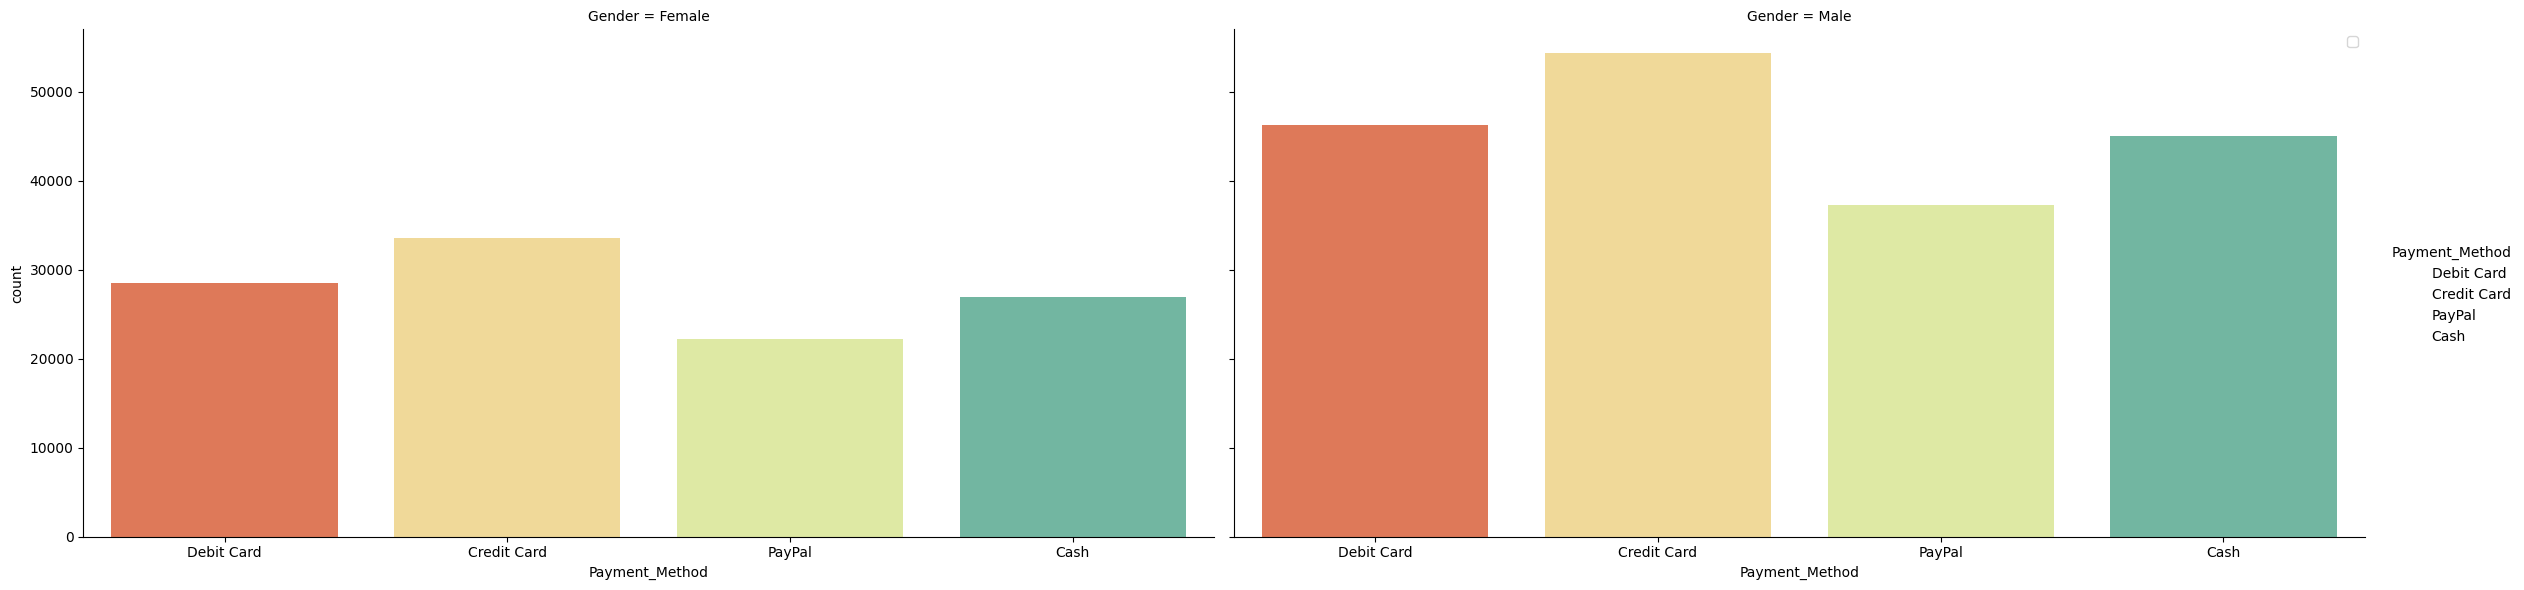

In [49]:
sns.catplot(kind='count', data=df, x='Payment_Method', palette='Spectral',  height=6, aspect=2, col='Gender', legend=True )
plt.legend()
plt.show()